# Exercise 10: Neural networks with Keras II

## GRA 4160

Go through the below examples and experiment with the code. Try to understand what is happening in each example. Try to change the code and see what happens.

1. Example of using different weight initialisations

2. Example of using different optimisers

# 1. Example of using different weight initialisations

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((60000, 28 * 28))
x_train = x_train.astype("float32") / 255

x_test = x_test.reshape((10000, 28 * 28))
x_test = x_test.astype("float32") / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
# Define a function to create the model with the specified weight initialization
def create_model(initializer):
    model = models.Sequential()
    model.add(layers.Dense(128, activation="relu", kernel_initializer=initializer, input_shape=(28 * 28,)))
    model.add(layers.Dense(64, activation="relu", kernel_initializer=initializer))
    model.add(layers.Dense(10, activation="softmax", kernel_initializer=initializer))

    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

In [14]:
# Create models with different weight initializations
initializers = {
    "Random Normal": tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None),
    "Glorot Uniform": tf.keras.initializers.GlorotUniform(seed=None),
    "He Normal": tf.keras.initializers.HeNormal(seed=None),
    "LeCun Normal": tf.keras.initializers.LecunNormal(seed=None),
}

for name, initializer in initializers.items():
    model = create_model(initializer)
    print(f"Training model with {name} initialization")
    history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test accuracy with {name} initialization: {test_acc}\n")

Training model with Random Normal initialization
Test accuracy with Random Normal initialization: 0.9765999913215637

Training model with Glorot Uniform initialization
Test accuracy with Glorot Uniform initialization: 0.9778000116348267

Training model with He Normal initialization
Test accuracy with He Normal initialization: 0.9778000116348267

Training model with LeCun Normal initialization
Test accuracy with LeCun Normal initialization: 0.9757999777793884



# 2. Example of using different optimisers

In [15]:

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

def create_simple_nn():
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

In [16]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [17]:
# Stochastic Gradient Descent (SGD):
model_sgd = create_simple_nn()
model_sgd.compile(optimizer='sgd',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history_sgd = model_sgd.fit(train_images, train_labels, epochs=10, batch_size=32,
                            validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 730us/step - loss: 0.6337 - accuracy: 0.8410 - val_loss: 0.3502 - val_accuracy: 0.9060
Epoch 2/10
1875/1875 [==============================] - 1s 707us/step - loss: 0.3319 - accuracy: 0.9076 - val_loss: 0.2887 - val_accuracy: 0.9195
Epoch 3/10
1875/1875 [==============================] - 1s 708us/step - loss: 0.2828 - accuracy: 0.9204 - val_loss: 0.2551 - val_accuracy: 0.9282
Epoch 4/10
1875/1875 [==============================] - 1s 704us/step - loss: 0.2522 - accuracy: 0.9292 - val_loss: 0.2336 - val_accuracy: 0.9340
Epoch 5/10
1875/1875 [==============================] - 1s 713us/step - loss: 0.2296 - accuracy: 0.9351 - val_loss: 0.2144 - val_accuracy: 0.9383
Epoch 6/10
1875/1875 [==============================] - 1s 711us/step - loss: 0.2114 - accuracy: 0.9409 - val_loss: 0.1989 - val_accuracy: 0.9443
Epoch 7/10
1875/1875 [==============================] - 1s 702us/step - loss: 0.1960 - accuracy: 0.9455 - val_loss: 0.1860 -

In [18]:
# Adam:
model_adam = create_simple_nn()
model_adam.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history_adam = model_adam.fit(train_images, train_labels, epochs=10, batch_size=32,
                              validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 808us/step - loss: 0.2587 - accuracy: 0.9265 - val_loss: 0.1317 - val_accuracy: 0.9622
Epoch 2/10
1875/1875 [==============================] - 1s 777us/step - loss: 0.1121 - accuracy: 0.9670 - val_loss: 0.0998 - val_accuracy: 0.9701
Epoch 3/10
1875/1875 [==============================] - 1s 775us/step - loss: 0.0767 - accuracy: 0.9764 - val_loss: 0.0792 - val_accuracy: 0.9748
Epoch 4/10
1875/1875 [==============================] - 1s 769us/step - loss: 0.0562 - accuracy: 0.9826 - val_loss: 0.0885 - val_accuracy: 0.9719
Epoch 5/10
1875/1875 [==============================] - 1s 771us/step - loss: 0.0446 - accuracy: 0.9861 - val_loss: 0.0778 - val_accuracy: 0.9764
Epoch 6/10
1875/1875 [==============================] - 2s 835us/step - loss: 0.0352 - accuracy: 0.9889 - val_loss: 0.0743 - val_accuracy: 0.9785
Epoch 7/10
1875/1875 [==============================] - 2s 802us/step - loss: 0.0279 - accuracy: 0.9914 - val_loss: 0.0808 -

In [19]:
# RMSprop:
model_rmsprop = create_simple_nn()
model_rmsprop.compile(optimizer='rmsprop',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

history_rmsprop = model_rmsprop.fit(train_images, train_labels, epochs=10, batch_size=32,
                                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 951us/step - loss: 0.2465 - accuracy: 0.9298 - val_loss: 0.1318 - val_accuracy: 0.9612
Epoch 2/10
1875/1875 [==============================] - 2s 919us/step - loss: 0.1135 - accuracy: 0.9669 - val_loss: 0.1007 - val_accuracy: 0.9701
Epoch 3/10
1875/1875 [==============================] - 2s 909us/step - loss: 0.0842 - accuracy: 0.9758 - val_loss: 0.0998 - val_accuracy: 0.9690
Epoch 4/10
1875/1875 [==============================] - 2s 917us/step - loss: 0.0693 - accuracy: 0.9801 - val_loss: 0.0842 - val_accuracy: 0.9756
Epoch 5/10
1875/1875 [==============================] - 2s 930us/step - loss: 0.0579 - accuracy: 0.9836 - val_loss: 0.0866 - val_accuracy: 0.9759
Epoch 6/10
1875/1875 [==============================] - 2s 908us/step - loss: 0.0508 - accuracy: 0.9864 - val_loss: 0.0843 - val_accuracy: 0.9784
Epoch 7/10
1875/1875 [==============================] - 2s 907us/step - loss: 0.0446 - accuracy: 0.9873 - val_loss: 0.0958 -

In [20]:
import matplotlib.pyplot as plt

def plot_history(optimizer_name, history):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'{optimizer_name} - Accuracy')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'{optimizer_name} - Loss')

    plt.show()

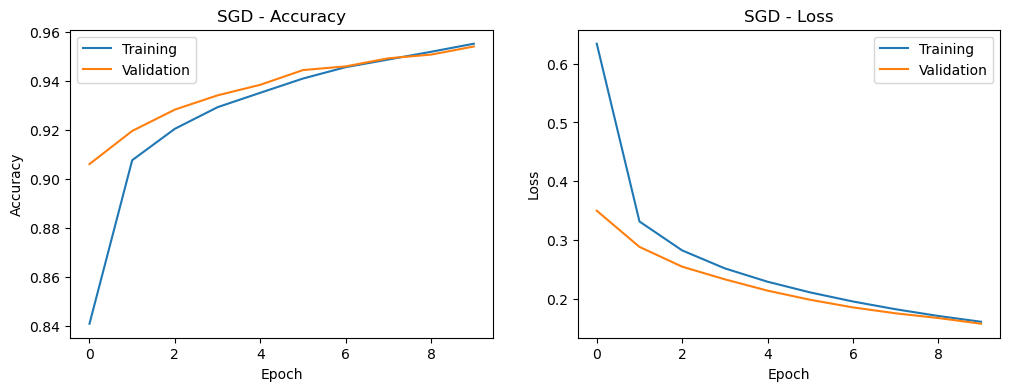

In [21]:
plot_history('SGD', history_sgd)

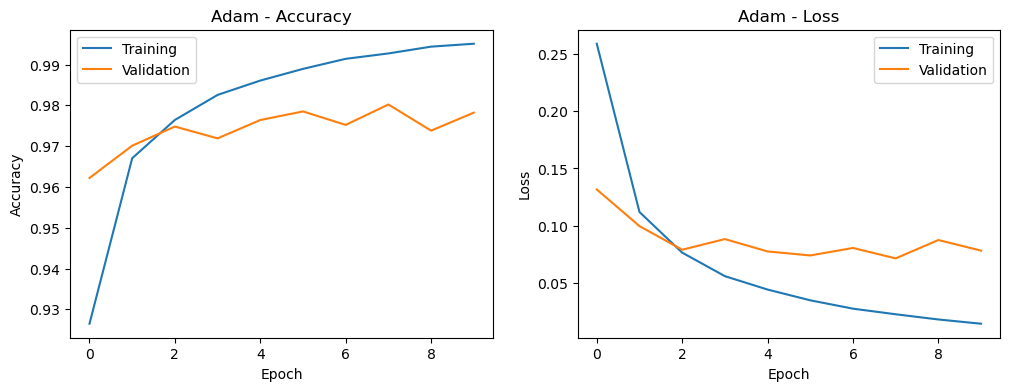

In [22]:
plot_history('Adam', history_adam)

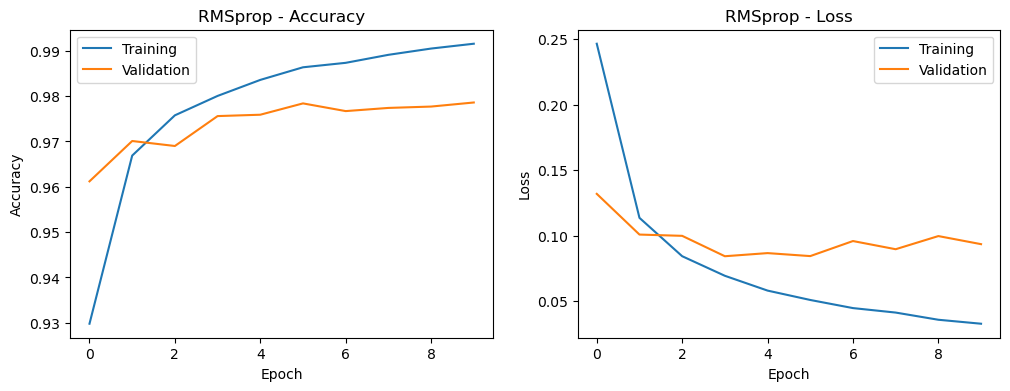

In [23]:
plot_history('RMSprop', history_rmsprop)